Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [41]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [42]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

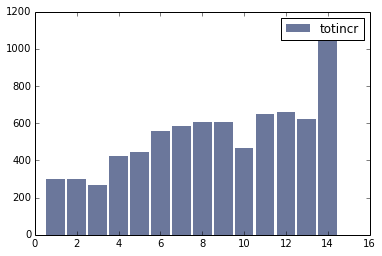

In [43]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

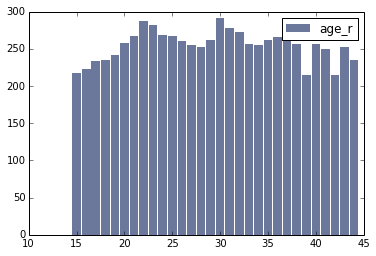

In [44]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

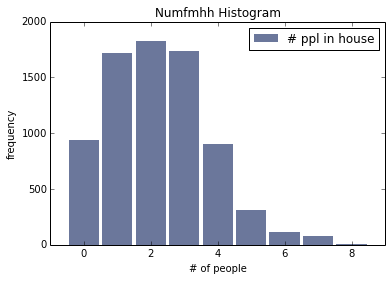

In [45]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='# ppl in house')
thinkplot.Show(title='Numfmhh Histogram',xlabel = '# of people',ylabel='frequency')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

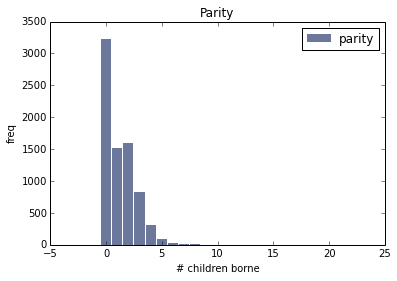

In [46]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(title='Parity', xlabel='# children borne',ylabel='freq')

The distribution is skewed to the right, mostly because there cannot be negative children. It seems that most people do not have children, and the ones that do prefer 1 or 2 children, and the probably having more subsequently gets less.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [47]:
print ('num_kids', 'freq')
for num_kids, freq in hist.Largest(10):
    print (num_kids, freq)

('num_kids', 'freq')
(22, 1)
(16, 1)
(10, 3)
(9, 2)
(8, 8)
(7, 15)
(6, 29)
(5, 95)
(4, 309)
(3, 828)


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

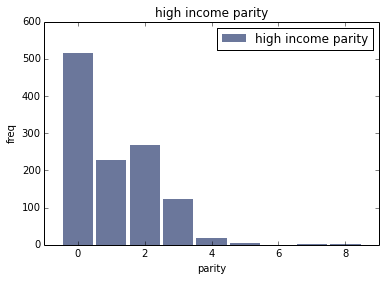

In [48]:
hist = thinkstats2.Hist(resp.totincr)
for totincome, freq in hist.Largest(1):
    richest_val = totincome
high_income = resp[resp.totincr == richest_val]

hist_high_income = thinkstats2.Hist(high_income.parity, label='high income parity')
thinkplot.Hist(hist_high_income)
thinkplot.Show(title='high income parity',xlabel='parity',ylabel='freq')

Find the largest parities for high income respondents.

In [49]:
print ('num_kids', 'freq')
for num_kids, freq in hist_high_income.Largest(5):
    print (num_kids, freq)

('num_kids', 'freq')
(8, 1)
(7, 1)
(5, 5)
(4, 19)
(3, 123)


Compare the mean <tt>parity</tt> for high income respondents and others.

In [50]:
other_income = resp[resp.totincr != richest_val]
mean_high_income = high_income.parity.mean()
mean_other_income = other_income.parity.mean()
print "High Income Parity Mean:", mean_high_income
print "Other Income Parity Mean:", mean_other_income

High Income Parity Mean: 1.07586206897
Other Income Parity Mean: 1.24957581367


Investigate any other variables that look interesting.

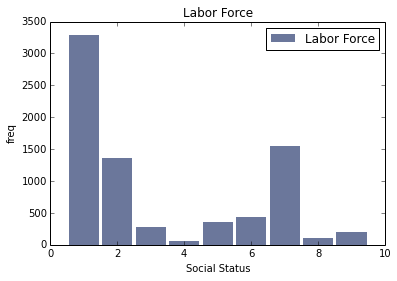

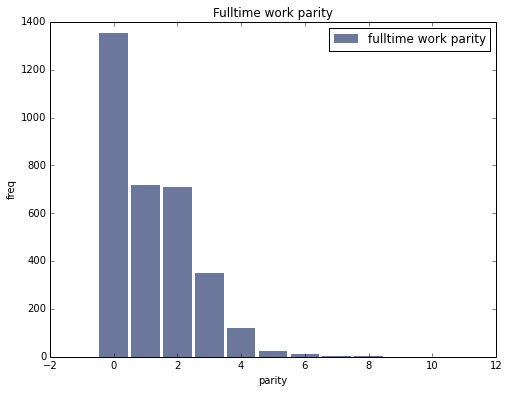

Fulltime Work Parity Mean: 1.18201154664
Other Work Parity Mean: 1.25436580882


In [51]:
# I will investigate different 
# labor force groups the respondent was a part of

# Create Histogram item for labor force
hist_laborfor = thinkstats2.Hist(resp.laborfor)
thinkplot.Hist(hist_laborfor, label='Labor Force')

"""
Key:
1	WORKING FULL-TIME	 	2763
2	WORKING PART-TIME	 	756
3	WORKING-TEMP ILL/ETC	 	168
4	WORKING-MATERNITY OR FAMILY LEAVE	 	7
5	NOT WORKING BUT LOOKING FOR WORK	 	302
6	SCHOOL	 	437
7	KEEPING HOUSE	 	222
8	CARING FOR FAMILY	 	34
9	OTHER	 	239
"""

# isolate the full time work group to a new hist item
thinkplot.Show(title='Labor Force', xlabel='Social Status',ylabel='freq')
fulltime_work = resp[resp.laborfor == 1]

# Graph parity for full time working respondents
hist_fulltime_work_parity = thinkstats2.Hist(fulltime_work.parity, label='fulltime work parity')
thinkplot.Hist(hist_fulltime_work_parity)
thinkplot.Show(title='Fulltime work parity',xlabel='parity',ylabel='freq')

# Finding mean of parity for both full time and other 
other_work = resp[resp.laborfor != 1]
mean_fulltime_work = fulltime_work.parity.mean()
mean_other_work = other_work.parity.mean()
print "Fulltime Work Parity Mean:", mean_fulltime_work
print "Other Work Parity Mean:", mean_other_work

By examining this, we see that the data corresponds with my predicted trend. People who work full time jobs seem to have less children as they do not have the time or money to afford them, compared to others.

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

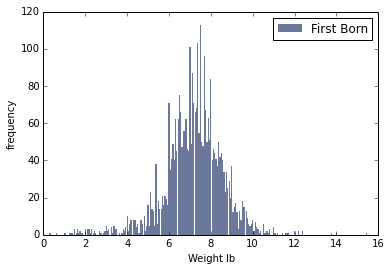

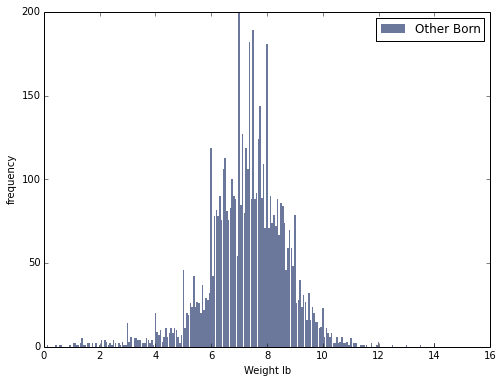

Effect Size: 0.0691182534882


In [52]:
# Import functions and data
import nsfg
import math
preg = nsfg.ReadFemPreg()

# Divide the data to first borns and other borns and make hist
first_weight = preg[preg.pregordr == 1]
other_weight = preg[preg.pregordr != 1]

first_weight_hist = thinkstats2.Hist(first_weight.totalwgt_lb, label='First Born')
other_weight_hist = thinkstats2.Hist(other_weight.totalwgt_lb, label='Other Born')

# Plot the histograms
thinkplot.Hist(first_weight_hist)
thinkplot.Show(xlabel='Weight lb', ylabel='frequency')
thinkplot.Hist(other_weight_hist)
thinkplot.Show(xlabel='Weight lb', ylabel='frequency')

# Function for computing Effect Size

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

print "Effect Size:", CohenEffectSize(other_weight.totalwgt_lb, first_weight.totalwgt_lb)

The effect size of the difference in total weight between the first born and others is 0.069, while the effect size for the pregnancy length for the first born and others are 0.029. The effect size is at least twice as greater for the weight than the length. This indicates that the relationship between birthorder has a higher correspondance with tota weight than it does with pregnancy length.